In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

Using TensorFlow backend.


In [2]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [3]:
import numpy as np

In [4]:
data = np.load('/Users/hdychi/.keras/datasets/cat.npz')

In [5]:
x_train = data['x_train']
y_train = data['y_train']
x_test = data['x_test']
y_test = data['y_test']

In [6]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(201, 64, 64, 3)
(201, 1)
(20, 64, 64, 3)
(20, 1)


In [7]:
import matplotlib.pyplot as plt
index = 27
im = plt.imshow(x_train[index])

In [8]:
# 拉伸，-1表示剩下的维度相乘成一维，即64*64*3
x_train_flatten = x_train.reshape(x_train.shape[0],-1)
x_test_flatten = x_test.reshape(x_test.shape[0],-1)

In [9]:
x_train_flatten.shape

(201, 12288)

In [10]:
x_test_flatten[0]

array([0.25039828, 0.18373162, 0.15235907, ..., 0.71663938, 0.63201928,
       0.5329384 ])

In [11]:
x_train = x_train_flatten / 255
x_test = x_test_flatten / 255

In [12]:
cat_model = Sequential()
cat_model.add(Dense(256, activation="relu", input_shape=(12288,)))
cat_model.add(Dense(128, activation="relu"))
cat_model.add(Dense(64, activation="relu"))
cat_model.add(Dense(32, activation="relu"))
cat_model.add(Dense(1, activation = "sigmoid"))

In [13]:
cat_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               3145984   
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 3,189,249
Trainable params: 3,189,249
Non-trainable params: 0
_________________________________________________________________


In [14]:
cat_model.compile(optimizer=SGD(), loss="binary_crossentropy", metrics=['accuracy'])

In [15]:
cat_model.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test))

Train on 201 samples, validate on 20 samples
Epoch 1/20
201/201 [==============================] - 1s 6ms/step - loss: 0.6766 - acc: 0.9204 - val_loss: 0.6492 - val_acc: 1.0000
Epoch 2/20
201/201 [==============================] - 0s 1ms/step - loss: 0.6326 - acc: 1.0000 - val_loss: 0.6061 - val_acc: 1.0000
Epoch 3/20
201/201 [==============================] - 0s 1ms/step - loss: 0.5908 - acc: 1.0000 - val_loss: 0.5660 - val_acc: 1.0000
Epoch 4/20
201/201 [==============================] - 0s 956us/step - loss: 0.5515 - acc: 1.0000 - val_loss: 0.5279 - val_acc: 1.0000
Epoch 5/20
201/201 [==============================] - 0s 1ms/step - loss: 0.5142 - acc: 1.0000 - val_loss: 0.4919 - val_acc: 1.0000
Epoch 6/20
201/201 [==============================] - 0s 1ms/step - loss: 0.4789 - acc: 1.0000 - val_loss: 0.4578 - val_acc: 1.0000
Epoch 7/20
201/201 [==============================] - 0s 1ms/step - loss: 0.4454 - acc: 1.0000 - val_loss: 0.4254 - val_acc: 1.0000
Epoch 8/20
201/201 [=========

In [16]:
import skimage
from skimage.transform import resize

In [29]:
image1_path = "/Users/hdychi/Pictures/cat2.jpeg"

In [30]:
image1_label = [1]

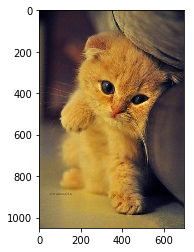

In [31]:
image1 = np.array(plt.imread(image1_path))
plt.imshow(image1)

In [23]:
num_px = 64
image1 = resize(image1,(num_px,num_px))

/anaconda2/envs/python3/lib/python2.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/anaconda2/envs/python3/lib/python2.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [26]:
image1.shape

(1, 12288)

In [25]:
image1 = image1.reshape(1,-1)

In [27]:
result = cat_model.predict(image1)

In [28]:
result

array([[0.9892244]], dtype=float32)